## Загрузка данных

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ismirnov56","key":"4443d5196fd2eebbc7b62bc8b480d636"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 94% 211M/225M [00:01<00:00, 191MB/s]
100% 225M/225M [00:01<00:00, 162MB/s]


In [7]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [8]:
root_data_path = 'flowers/'

In [9]:
import os

CLASSES = os.listdir(root_data_path)

In [10]:
FILES_MAPPING = {
    'sunflower': 'подсолнух',
    'dandelion': 'одуванчик',
    'daisy': 'маргаритка', 
    'tulip': 'тюльпан',
    'rose': 'роза'
}

In [17]:
from PIL import Image
import numpy as np
import cv2
IMAGE_DIM = 150, 150


train = []  

for i in CLASSES:
    path = os.path.join(root_data_path, i)
    idx = CLASSES.index(i)
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, IMAGE_DIM)
            train.append([img_array, idx])

In [18]:
X=[] #Training images
y=[] #labels
for i,j in train:
    X.append(i)
    y.append(j)

In [19]:
del train

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from keras import Input
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Activation, Dense

In [20]:
X = np.array(X).reshape(-1,*IMAGE_DIM,3)/255.0

y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3453, 150, 150, 3), (3453, 5), (864, 150, 150, 3), (864, 5))

In [21]:
x_train_perseptron = x_train.reshape(-1,IMAGE_DIM[0]*IMAGE_DIM[1]*3)
x_test_perseptron = x_test.reshape(-1,IMAGE_DIM[0]*IMAGE_DIM[1]*3)

x_train_perseptron.shape, x_test_perseptron.shape

((3453, 67500), (864, 67500))

In [22]:
EPOCHS = 20
BATCH_SIZE = 128
NUM_TRAINING_IMAGES = x_train.shape[0]
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

In [23]:
def start_learn_perseptron(obj):
    print(obj.summary())
    obj.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
    history = obj.fit(x_train_perseptron, y_train, epochs=EPOCHS, verbose = 1, validation_data = (x_test_perseptron,y_test), steps_per_epoch = STEPS_PER_EPOCH).history
    print(history)
    results = obj.evaluate(x_test_perseptron, y_test, batch_size = BATCH_SIZE)
    print("Validation loss, accuracy:", results)
    return history

In [24]:
perseptron_histories = []

In [25]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dense(5, activation="softmax")
])
perseptron_histories.append(start_learn_perseptron(perseptron))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 34,563,077
Trainable params: 34,563,077
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
26/26 [==============================] - 13s 477ms/step - loss: 43.7582 - accuracy: 0.2462 - val_loss: 16.1058 - val_accuracy: 0.3113
Epoch 2/20
26/26 [==============================] - 12s 466ms/step - loss: 5.9121 - accuracy: 0.3235 - val_loss: 3.8033 - val_accuracy: 0.3333
Epoch 3/20
26/26 [==============================] - 12s 468ms/step - loss: 1.7838 - accuracy: 0.4373 - val_loss: 1.5323 - val_accuracy: 0.3993
Epoc

In [26]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dense(512, activation="relu"),
      Dense(5, activation="softmax")
  ])
perseptron_histories.append(start_learn_perseptron(perseptron))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               34560512  
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 34,825,733
Trainable params: 34,825,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
26/26 [==============================] - 14s 524ms/step - loss: 30.4539 - accuracy: 0.2242 - val_loss: 7.2665 - val_accuracy: 0.2593
Epoch 2/20
26/26 [==============================] - 13s 506ms/step - loss: 2.4676 - accuracy: 0.3325 - val_loss: 1.5409 - val_accuracy: 0.3530
Epoch 3/20
26/

In [28]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(5, activation="softmax")
  ])
perseptron_histories.append(start_learn_perseptron(perseptron))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               34560512  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 34,825,733
Trainable params: 34,825,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
26/26 [===================

In [29]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(256, activation="relu"),
      Dropout(0.2),
      Dense(5, activation="softmax")
  ])
perseptron_histories.append(start_learn_perseptron(perseptron))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               34560512  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [30]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(1024, activation="relu"),
      Dropout(0.2),
      Dense(1024, activation="relu"),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(5, activation="softmax")
  ])
perseptron_histories.append(start_learn_perseptron(perseptron))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               34560512  
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 1024)             

In [32]:
perseptron_histories =[{'accuracy': [0.2461627572774887,
   0.3234868347644806,
   0.4373008906841278,
   0.46799883246421814,
   0.48276859521865845,
   0.5253402590751648,
   0.4969591796398163,
   0.5771792531013489,
   0.5070952773094177,
   0.5609614849090576,
   0.5849985480308533,
   0.5427165031433105,
   0.6038227677345276,
   0.6547929048538208,
   0.6617434024810791,
   0.6461048126220703,
   0.6852012872695923,
   0.629887044429779,
   0.7185056209564209,
   0.7315378189086914],
  'loss': [43.75822067260742,
   5.912120342254639,
   1.7838338613510132,
   1.4172025918960571,
   1.366568684577942,
   1.1971092224121094,
   1.3656725883483887,
   1.100143313407898,
   1.3146506547927856,
   1.1524958610534668,
   1.0969198942184448,
   1.270513653755188,
   1.0631942749023438,
   0.9131054282188416,
   0.8959758877754211,
   0.9242618083953857,
   0.8408979177474976,
   0.9756925106048584,
   0.7701719403266907,
   0.7526142001152039],
  'val_accuracy': [0.31134259700775146,
   0.3333333432674408,
   0.3993055522441864,
   0.40625,
   0.42592594027519226,
   0.42592594027519226,
   0.4201388955116272,
   0.41550925374031067,
   0.31365740299224854,
   0.4479166567325592,
   0.43287035822868347,
   0.37268519401550293,
   0.44328704476356506,
   0.44675925374031067,
   0.4652777910232544,
   0.38425925374031067,
   0.37962964177131653,
   0.42592594027519226,
   0.43865740299224854,
   0.43865740299224854],
  'val_loss': [16.105783462524414,
   3.8032801151275635,
   1.532319188117981,
   1.5078870058059692,
   1.3832381963729858,
   1.4769110679626465,
   1.456628680229187,
   1.57064688205719,
   2.2580106258392334,
   1.4117792844772339,
   1.4611976146697998,
   1.7461669445037842,
   1.4614084959030151,
   1.3893224000930786,
   1.3911582231521606,
   1.5738673210144043,
   2.1204593181610107,
   1.5761922597885132,
   1.6300625801086426,
   1.8093870878219604]},
 {'accuracy': [0.22415290772914886,
   0.3324645161628723,
   0.45236027240753174,
   0.4590211510658264,
   0.5013031959533691,
   0.5050680637359619,
   0.5502461791038513,
   0.5363451838493347,
   0.5855777859687805,
   0.5766000747680664,
   0.5505357384681702,
   0.6128004789352417,
   0.6293078660964966,
   0.6475528478622437,
   0.626122236251831,
   0.6495800614356995,
   0.678250789642334,
   0.6666666865348816,
   0.7112655639648438,
   0.6741963624954224],
  'loss': [30.45392608642578,
   2.4676458835601807,
   1.3062902688980103,
   1.2920857667922974,
   1.1820493936538696,
   1.1732410192489624,
   1.088582158088684,
   1.0971142053604126,
   1.0371533632278442,
   1.0342466831207275,
   1.1021734476089478,
   0.978066086769104,
   0.9637830257415771,
   0.9139094352722168,
   0.9309199452400208,
   0.899025022983551,
   0.835060715675354,
   0.8673836588859558,
   0.7734173536300659,
   0.8727612495422363],
  'val_accuracy': [0.25925925374031067,
   0.35300925374031067,
   0.42592594027519226,
   0.4131944477558136,
   0.42129629850387573,
   0.3958333432674408,
   0.44328704476356506,
   0.4652777910232544,
   0.46990740299224854,
   0.4513888955116272,
   0.43981480598449707,
   0.47106480598449707,
   0.44675925374031067,
   0.4652777910232544,
   0.4479166567325592,
   0.47453704476356506,
   0.4375,
   0.46296295523643494,
   0.48148149251937866,
   0.4722222089767456],
  'val_loss': [7.266513347625732,
   1.5409364700317383,
   1.2829869985580444,
   1.3503260612487793,
   1.3456430435180664,
   1.4355759620666504,
   1.2759658098220825,
   1.2320882081985474,
   1.2446081638336182,
   1.3484742641448975,
   1.2790777683258057,
   1.2870874404907227,
   1.3875867128372192,
   1.3046537637710571,
   1.3434984683990479,
   1.2820534706115723,
   1.4809352159500122,
   1.333862543106079,
   1.2825196981430054,
   1.4203187227249146]},
 {'accuracy': [0.2490587830543518,
   0.3116130828857422,
   0.36924412846565247,
   0.393860399723053,
   0.41500145196914673,
   0.3753257989883423,
   0.376484215259552,
   0.3863307237625122,
   0.4100781977176666,
   0.3987836539745331,
   0.4109469950199127,
   0.3982044458389282,
   0.3941500186920166,
   0.36142483353614807,
   0.37127137184143066,
   0.35360556840896606,
   0.3871995508670807,
   0.4028381109237671,
   0.3874891400337219,
   0.41210541129112244],
  'loss': [13.9733247756958,
   1.537184238433838,
   1.4299348592758179,
   1.359239101409912,
   1.33003568649292,
   1.4204102754592896,
   1.4318535327911377,
   1.4031082391738892,
   1.3356547355651855,
   1.3523517847061157,
   1.3211009502410889,
   1.3664159774780273,
   1.3372224569320679,
   1.3743870258331299,
   1.350858449935913,
   1.3976263999938965,
   1.3550832271575928,
   1.3324722051620483,
   1.3651570081710815,
   1.3047600984573364],
  'val_accuracy': [0.29745370149612427,
   0.35995370149612427,
   0.4201388955116272,
   0.4201388955116272,
   0.39814814925193787,
   0.35995370149612427,
   0.3715277910232544,
   0.3680555522441864,
   0.40509259700775146,
   0.40740740299224854,
   0.41782405972480774,
   0.3298611044883728,
   0.3055555522441864,
   0.31712964177131653,
   0.41898149251937866,
   0.29745370149612427,
   0.38773149251937866,
   0.38657405972480774,
   0.3541666567325592,
   0.36226850748062134],
  'val_loss': [1.6517518758773804,
   1.4357322454452515,
   1.3167604207992554,
   1.288063645362854,
   1.3718816041946411,
   1.4601179361343384,
   1.3813732862472534,
   1.3865830898284912,
   1.322571873664856,
   1.3614357709884644,
   1.3312119245529175,
   1.406493902206421,
   1.4420338869094849,
   1.386836051940918,
   1.360826015472412,
   1.483555555343628,
   1.3800597190856934,
   1.35762357711792,
   1.4251618385314941,
   1.4786462783813477]},
 {'accuracy': [0.23370981216430664,
   0.29481610655784607,
   0.37011295557022095,
   0.39733564853668213,
   0.393860399723053,
   0.41529104113578796,
   0.40949898958206177,
   0.3744570016860962,
   0.4002316892147064,
   0.40631335973739624,
   0.3909643888473511,
   0.37416738271713257,
   0.40428611636161804,
   0.4135534465312958,
   0.40457573533058167,
   0.37416738271713257,
   0.37706342339515686,
   0.40457573533058167,
   0.39849406480789185,
   0.3851723074913025],
  'loss': [20.969406127929688,
   1.6898688077926636,
   1.4474272727966309,
   1.3703826665878296,
   1.3459374904632568,
   1.3284251689910889,
   1.333866834640503,
   1.398276448249817,
   1.3593392372131348,
   1.308587670326233,
   1.3076744079589844,
   1.3390306234359741,
   1.3189336061477661,
   1.2819873094558716,
   1.2927151918411255,
   1.3505257368087769,
   1.3829020261764526,
   1.3538894653320312,
   1.3135147094726562,
   1.303707242012024],
  'val_accuracy': [0.29398149251937866,
   0.36574074625968933,
   0.40625,
   0.40625,
   0.41435185074806213,
   0.3784722089767456,
   0.40856480598449707,
   0.4097222089767456,
   0.38078704476356506,
   0.41203704476356506,
   0.41087964177131653,
   0.39004629850387573,
   0.41782405972480774,
   0.44328704476356506,
   0.40162035822868347,
   0.38425925374031067,
   0.39699074625968933,
   0.3784722089767456,
   0.38773149251937866,
   0.41550925374031067],
  'val_loss': [2.0024895668029785,
   1.4697543382644653,
   1.3883671760559082,
   1.3458658456802368,
   1.3167474269866943,
   1.309931993484497,
   1.3455193042755127,
   1.3084019422531128,
   1.3666291236877441,
   1.277951955795288,
   1.3079688549041748,
   1.338966965675354,
   1.3200218677520752,
   1.262912631034851,
   1.3341814279556274,
   1.398228645324707,
   1.3602995872497559,
   1.3295615911483765,
   1.317102074623108,
   1.2971404790878296]},
 {'accuracy': [0.2371850609779358,
   0.31132349371910095,
   0.38604113459587097,
   0.4002316892147064,
   0.40631335973739624,
   0.4135534465312958,
   0.4037069082260132,
   0.41413262486457825,
   0.42803359031677246,
   0.4384593069553375,
   0.41326382756233215,
   0.4028381109237671,
   0.4459889829158783,
   0.4480162262916565,
   0.4216623306274414,
   0.44859543442726135,
   0.44569939374923706,
   0.45467710494995117,
   0.4286127984523773,
   0.42716479301452637],
  'loss': [6.5033769607543945,
   1.5429552793502808,
   1.3951972723007202,
   1.357812762260437,
   1.3244695663452148,
   1.312954306602478,
   1.3399308919906616,
   1.3131415843963623,
   1.276973009109497,
   1.2669602632522583,
   1.3154289722442627,
   1.3074342012405396,
   1.2452195882797241,
   1.2316436767578125,
   1.2512048482894897,
   1.2242401838302612,
   1.2134054899215698,
   1.2013269662857056,
   1.2391929626464844,
   1.2197812795639038],
  'val_accuracy': [0.28935185074806213,
   0.41087964177131653,
   0.42129629850387573,
   0.43518519401550293,
   0.43981480598449707,
   0.3958333432674408,
   0.4236111044883728,
   0.43865740299224854,
   0.43981480598449707,
   0.4201388955116272,
   0.3958333432674408,
   0.46990740299224854,
   0.45601850748062134,
   0.44675925374031067,
   0.41550925374031067,
   0.40740740299224854,
   0.4166666567325592,
   0.4201388955116272,
   0.4375,
   0.4375],
  'val_loss': [1.5424284934997559,
   1.3644160032272339,
   1.3150445222854614,
   1.2707191705703735,
   1.2770757675170898,
   1.3379775285720825,
   1.2945207357406616,
   1.2834811210632324,
   1.2520452737808228,
   1.316127896308899,
   1.3177969455718994,
   1.245282769203186,
   1.2514227628707886,
   1.2481462955474854,
   1.258593201637268,
   1.2625638246536255,
   1.286442518234253,
   1.2888818979263306,
   1.2913178205490112,
   1.2977142333984375]},
 {'accuracy': [0.21604402363300323,
   0.26006370782852173,
   0.3095858693122864,
   0.3588184118270874,
   0.39270198345184326,
   0.4164494574069977,
   0.39472922682762146,
   0.425716757774353,
   0.40834057331085205,
   0.4283232092857361,
   0.43208804726600647,
   0.44830581545829773,
   0.44164493680000305,
   0.43064001202583313,
   0.4370113015174866,
   0.4569939076900482,
   0.4419345557689667,
   0.4187662899494171,
   0.41413262486457825,
   0.451201856136322],
  'loss': [3.0026955604553223,
   1.5786038637161255,
   1.5085653066635132,
   1.4400789737701416,
   1.3669496774673462,
   1.3296399116516113,
   1.327345371246338,
   1.2949562072753906,
   1.2831648588180542,
   1.289118766784668,
   1.259959101676941,
   1.2277752161026,
   1.2402242422103882,
   1.264450192451477,
   1.2658506631851196,
   1.2351547479629517,
   1.2773325443267822,
   1.3130087852478027,
   1.3197855949401855,
   1.2351561784744263],
  'val_accuracy': [0.20601852238178253,
   0.3298611044883728,
   0.3541666567325592,
   0.38078704476356506,
   0.41087964177131653,
   0.40046295523643494,
   0.41898149251937866,
   0.41435185074806213,
   0.42824074625968933,
   0.4305555522441864,
   0.39004629850387573,
   0.4791666567325592,
   0.39814814925193787,
   0.3993055522441864,
   0.4305555522441864,
   0.42476850748062134,
   0.42129629850387573,
   0.3784722089767456,
   0.40625,
   0.42824074625968933],
  'val_loss': [1.6080186367034912,
   1.4810867309570312,
   1.4286909103393555,
   1.36638343334198,
   1.298327922821045,
   1.314970850944519,
   1.2771188020706177,
   1.274457573890686,
   1.2913603782653809,
   1.2802386283874512,
   1.3445550203323364,
   1.235234022140503,
   1.2956140041351318,
   1.3517009019851685,
   1.2647409439086914,
   1.2743170261383057,
   1.286670207977295,
   1.3849691152572632,
   1.308988332748413,
   1.2905250787734985]}]

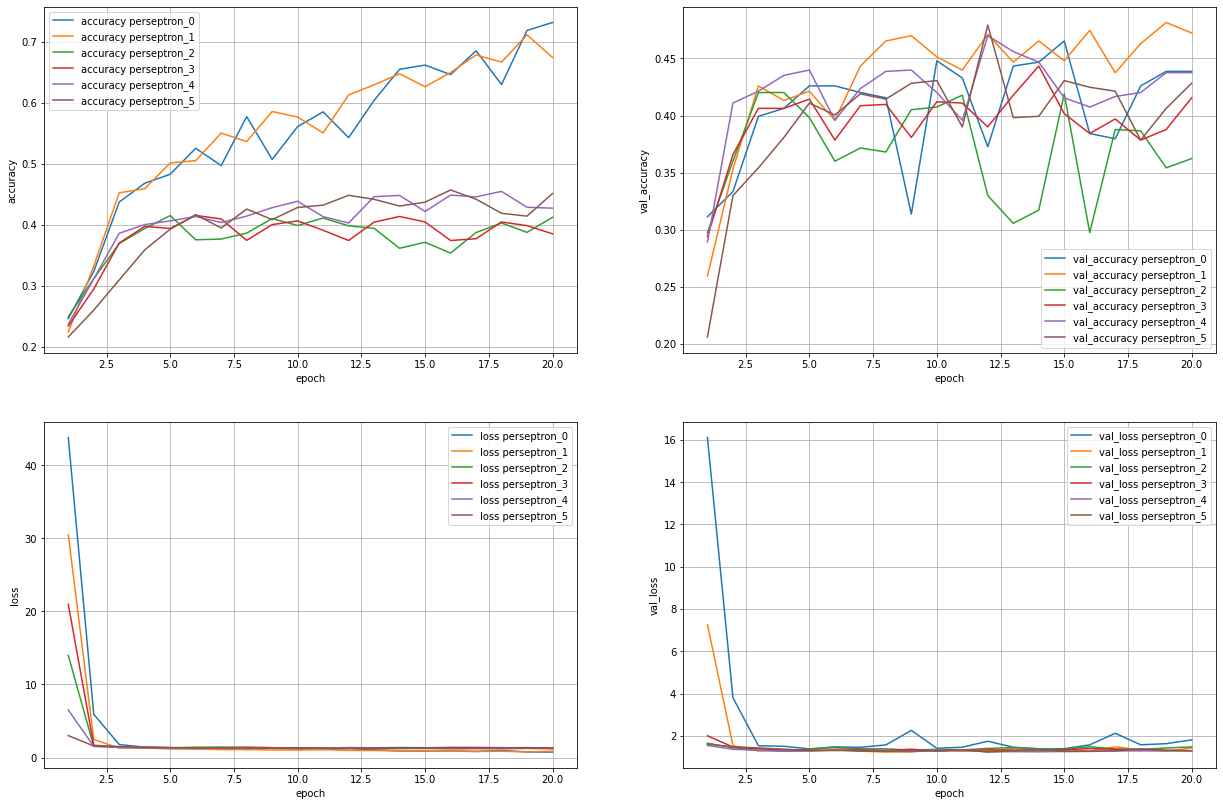

In [53]:
import matplotlib.pyplot as plt

epoch_range = list(range(1,21))

figure, axis = plt.subplots(2, 2, figsize=(21, 14))

plots_map = {
    'accuracy': axis[0, 0],
    'val_accuracy': axis[0, 1],
    'loss': axis[1, 0],
    'val_loss': axis[1, 1]
}

for attr, value in plots_map.items():
    for i, h in enumerate(perseptron_histories):
        value.plot(epoch_range, h[attr], label=f'{attr} perseptron_{i}')
    value.set_ylabel(attr)
    value.set_xlabel('epoch')
    value.legend()
    value.grid()

plt.show()